In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/data_3hrs.csv', encoding='ISO-8859-1')
df.columns = ["Timestamp (ms)", "Humidity (%)", "Temperature (°F)", "Temperature (°C)"]
df["Timestamp (s)"] = df["Timestamp (ms)"] / 1000
df["Time (mins)"] = (df["Timestamp (s)"] - df["Timestamp (s)"].min()) / 60

### Basic dataset information

In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp (ms)    5400 non-null   int64  
 1   Humidity (%)      5400 non-null   float64
 2   Temperature (°F)  5400 non-null   float64
 3   Temperature (°C)  5400 non-null   float64
 4   Timestamp (s)     5400 non-null   float64
 5   Time (mins)       5400 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 253.3 KB
None
       Timestamp (ms)  Humidity (%)  Temperature (°F)  Temperature (°C)  \
count    5.400000e+03   5400.000000       5400.000000       5400.000000   
mean     5.399000e+06     45.010431         77.078378         25.043541   
std      3.117980e+06      1.491107          1.230908          0.683881   
min      0.000000e+00     40.000000         73.910000         23.280000   
25%      2.699500e+06     44.020000         76.410000         24.670000   
50%      5.


### Plot temperature variations over time

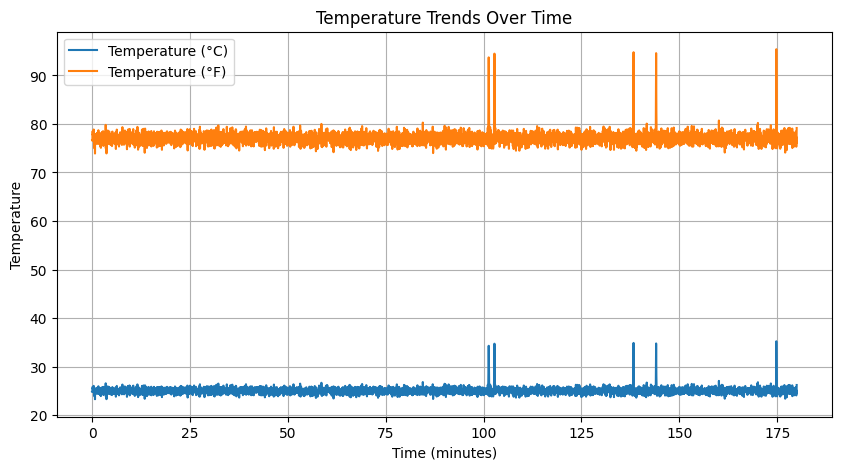

In [3]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Time (mins)"], y=df["Temperature (°C)"], label="Temperature (°C)")
sns.lineplot(x=df["Time (mins)"], y=df["Temperature (°F)"], label="Temperature (°F)")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature")
plt.title("Temperature Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


### Plot humidity variations over time

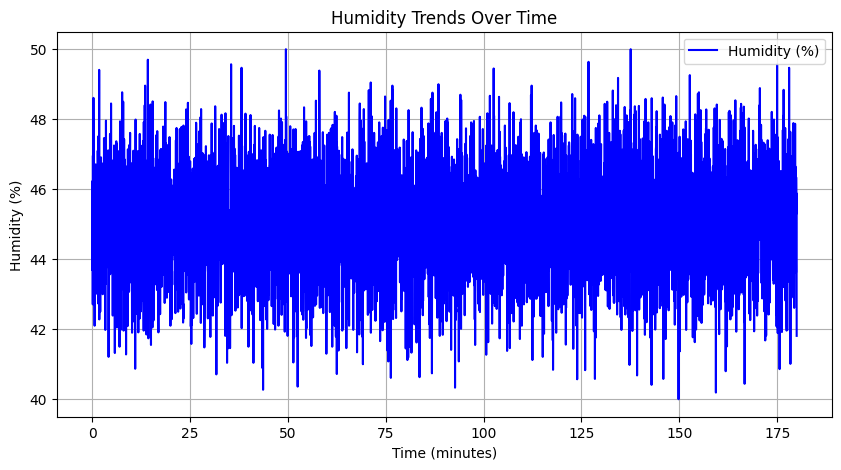

In [4]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Time (mins)"], y=df["Humidity (%)"], color="blue", label="Humidity (%)")
plt.xlabel("Time (minutes)")
plt.ylabel("Humidity (%)")
plt.title("Humidity Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


### Identifying artificial temperature peaks (outliers)

In [5]:

q1 = df["Temperature (°C)"].quantile(0.25)
q3 = df["Temperature (°C)"].quantile(0.75)
iqr = q3 - q1
threshold = q3 + 12 * iqr  # Upper bound for detecting outliers

outliers = df[df["Temperature (°C)"] > threshold]
print(f"Detected {len(outliers)} artificial temperature peaks.")
print(outliers)

Detected 5 artificial temperature peaks.
      Timestamp (ms)  Humidity (%)  Temperature (°F)  Temperature (°C)  \
3039         6078000         46.47             93.72             34.29   
3083         6166000         42.75             94.49             34.72   
4149         8298000         45.53             94.78             34.88   
4322         8644000         47.24             94.59             34.77   
5243        10486000         46.98             95.40             35.22   

      Timestamp (s)  Time (mins)  
3039         6078.0   101.300000  
3083         6166.0   102.766667  
4149         8298.0   138.300000  
4322         8644.0   144.066667  
5243        10486.0   174.766667  


### Plot histogram of temperature distribution

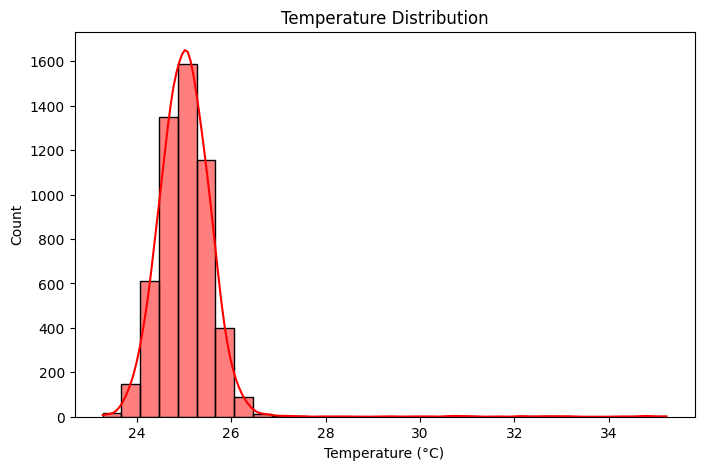

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Temperature (°C)"], bins=30, kde=True, color="red")
plt.xlabel("Temperature (°C)")
plt.title("Temperature Distribution")
plt.show()

### Plot correlation heatmap

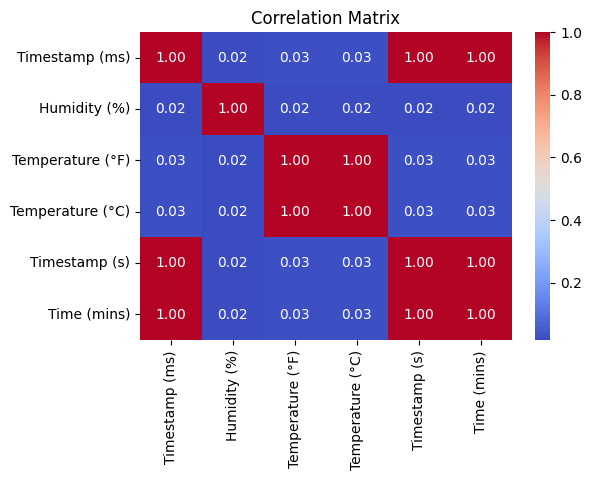

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()